In [1]:
import numpy as np
from scipy.fft import fft,fftfreq,rfft,rfftfreq

In [2]:
def sine_wave(freq,s_rate,duration):
    t = np.linspace(0,duration,s_rate*duration,endpoint = False)
    x = np.sin(freq*2*np.pi*t)
    return t,x

In [3]:
FREQ_A = 15000000 #Hz
FREQ_B = 200000000 #Hz
S_RATE = 65536
DURATION = 4

_,nice_tone = sine_wave(FREQ_A,S_RATE,DURATION)
_,noise_tone = sine_wave(FREQ_B,S_RATE,DURATION)
noise_tone = noise_tone * 0.3
mixed_tone = noise_tone + nice_tone

In [4]:
normalise_tone = np.int16(mixed_tone/mixed_tone.max()*32767)


In [5]:
from matplotlib import pyplot as plt

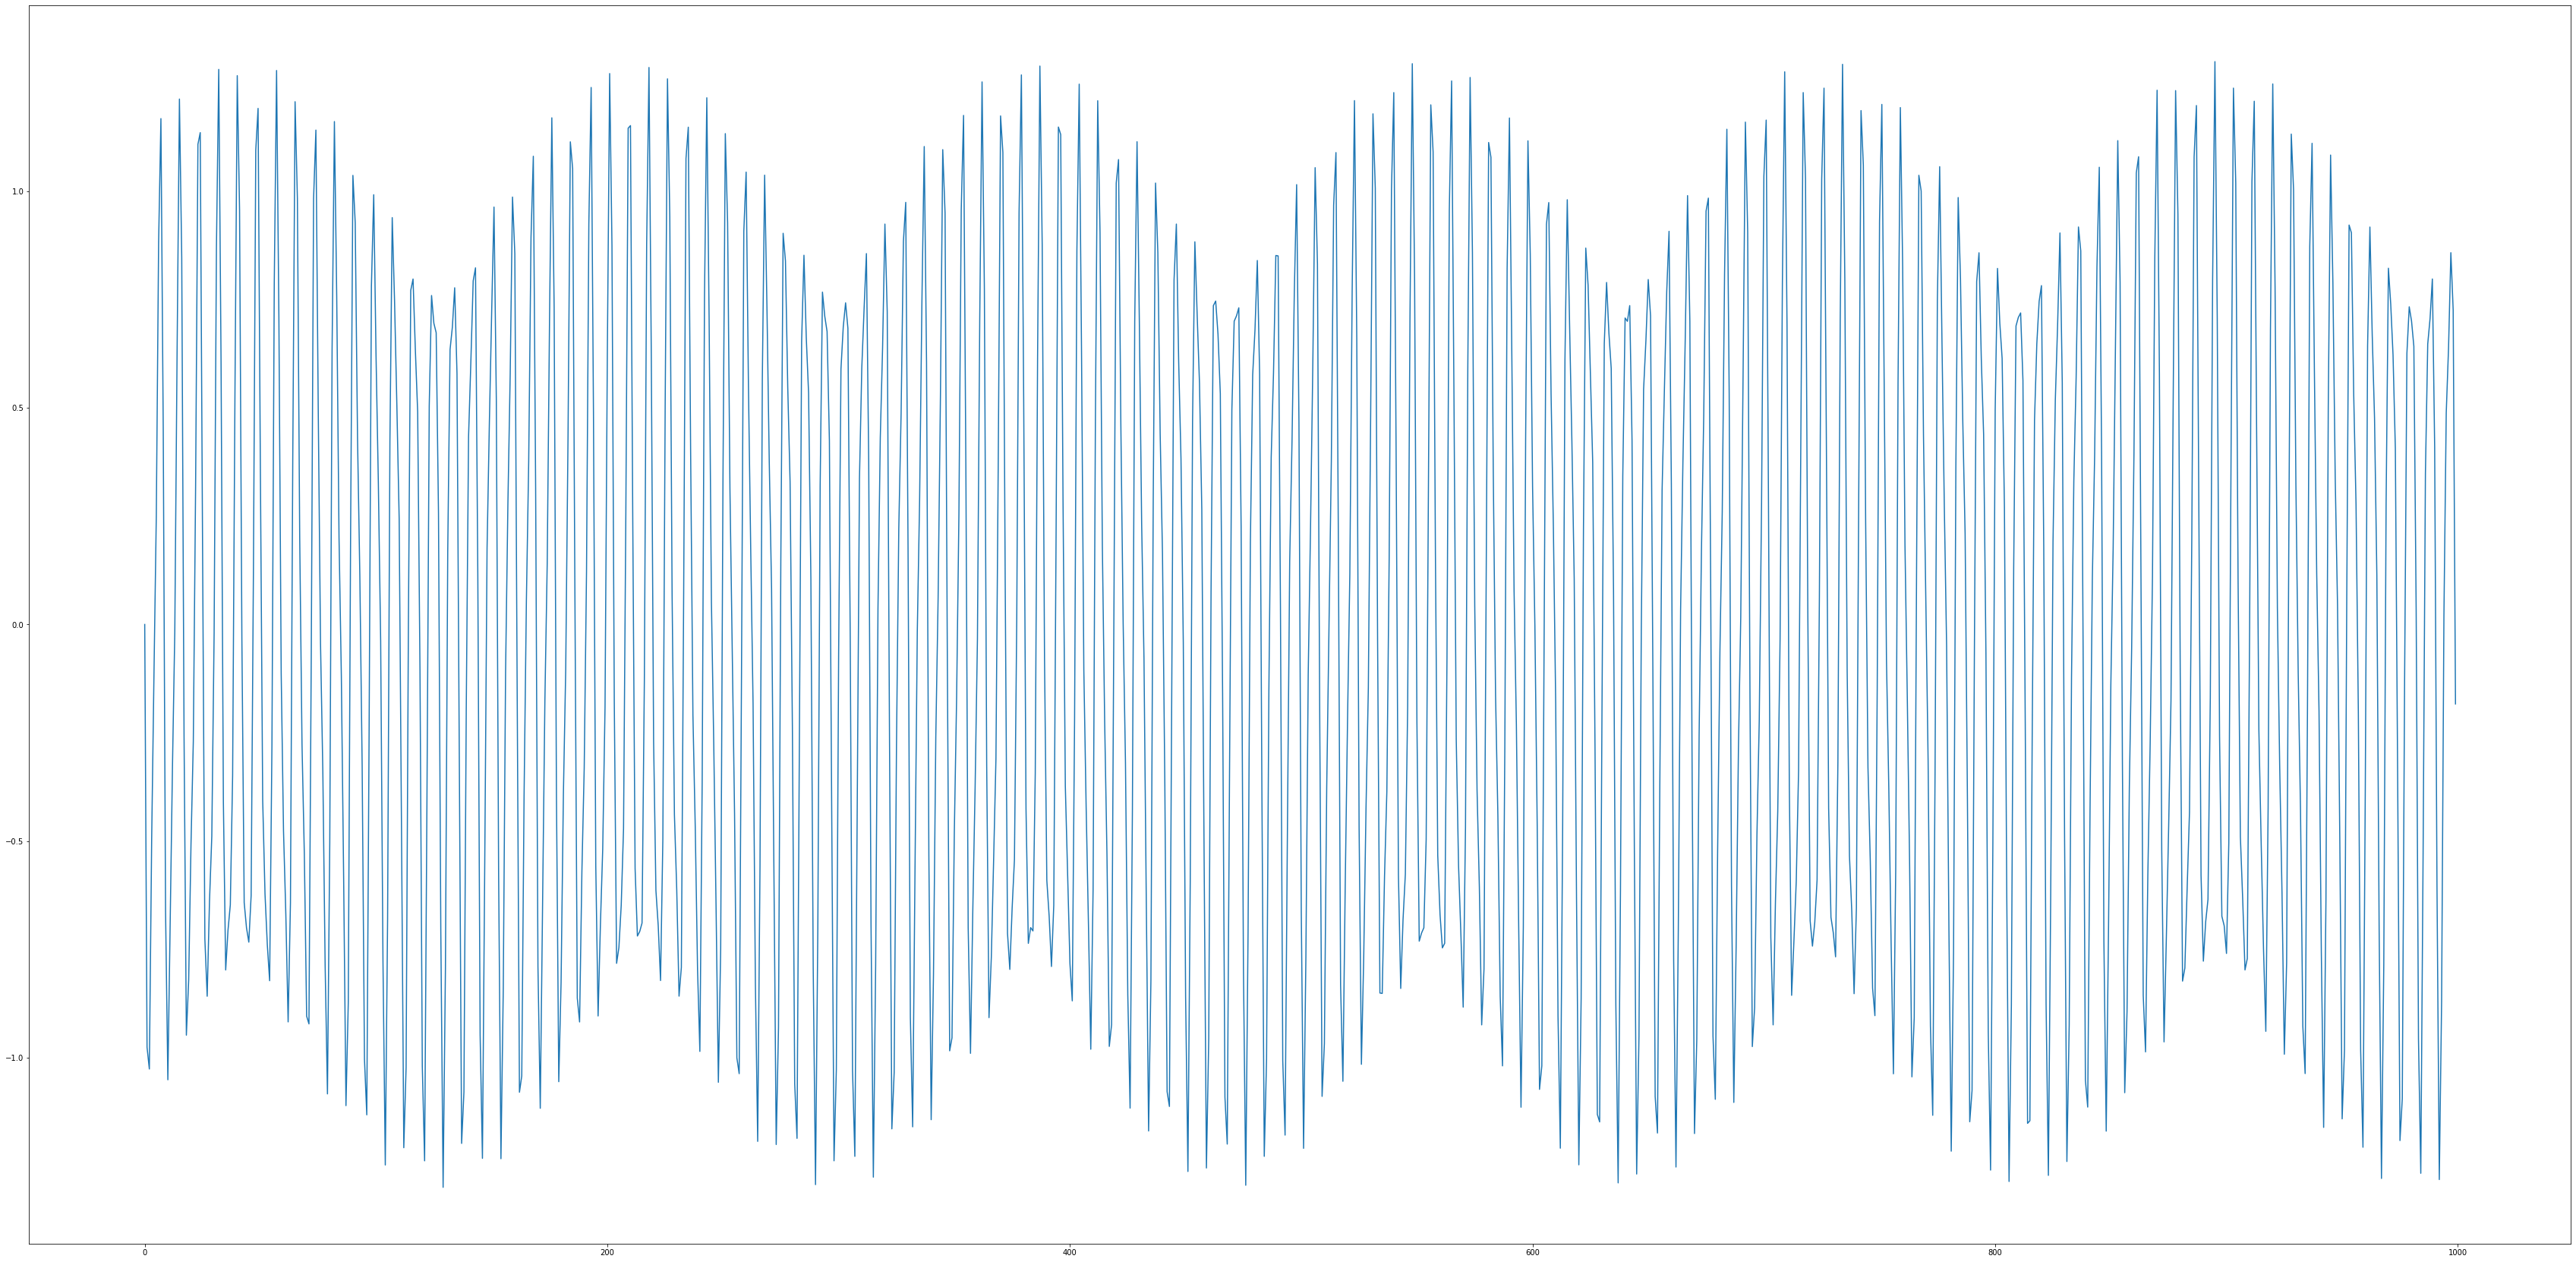

In [6]:
plt.figure(figsize=(60,30))
plt.plot(mixed_tone[:1000])
plt.show()

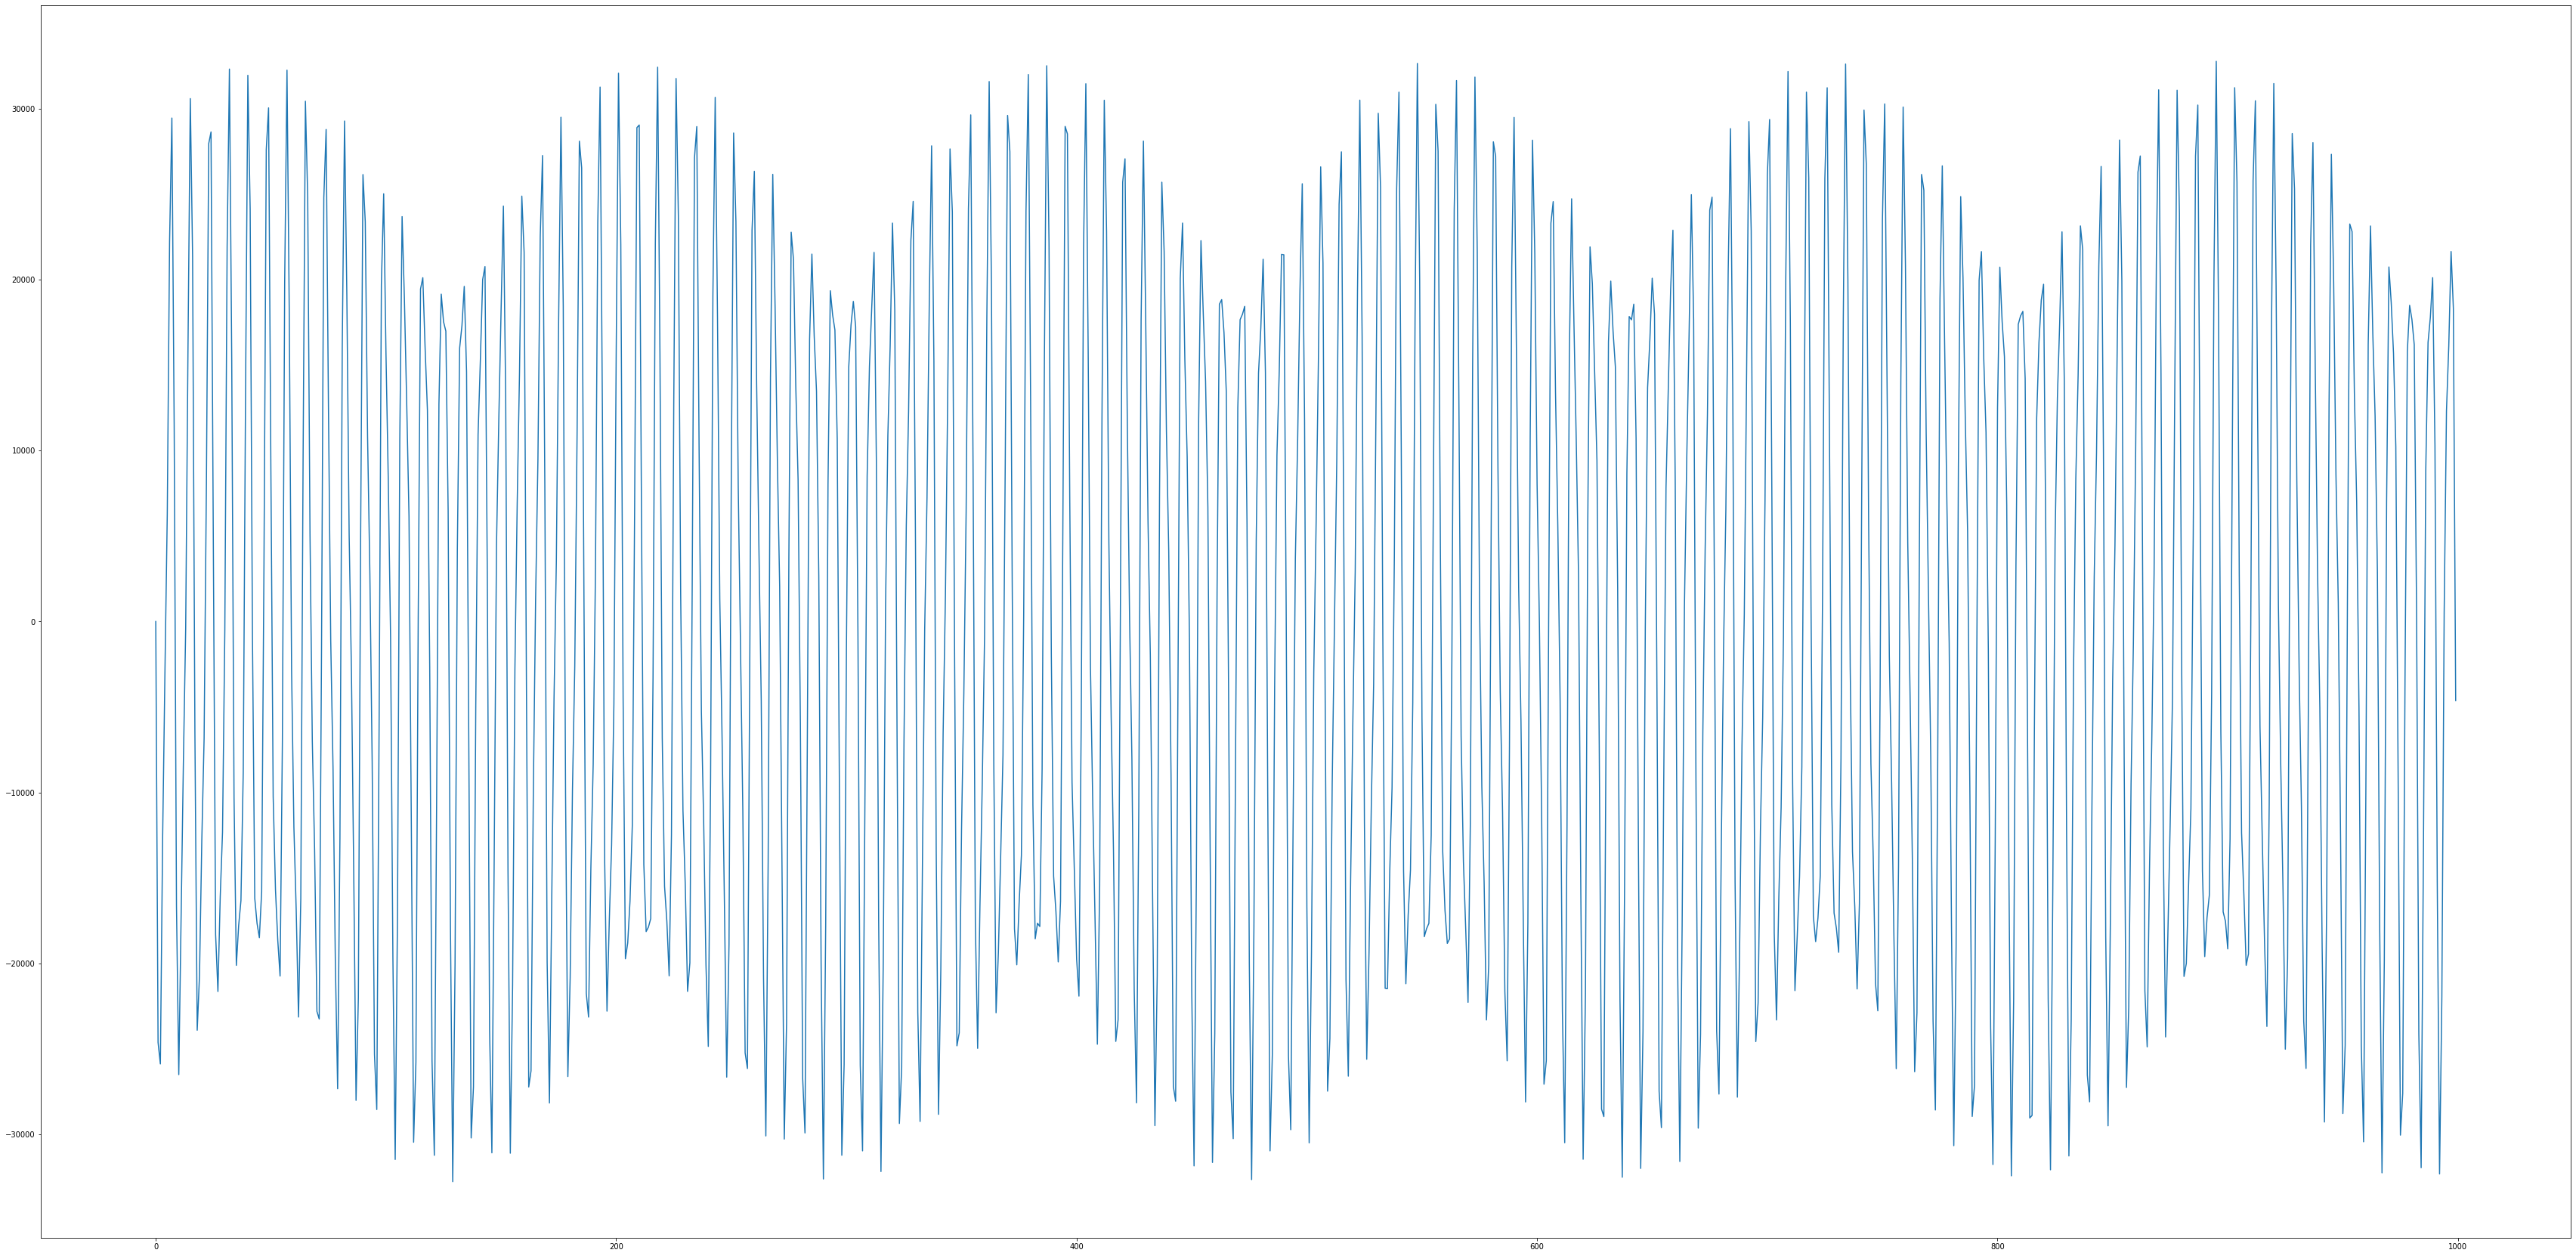

In [7]:
plt.figure(figsize=(60,30))
plt.plot(normalise_tone[:1000])
plt.show()

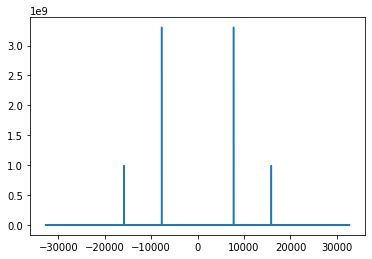

In [8]:
N = S_RATE*DURATION
yf = fft(normalise_tone)
xf = fftfreq(N,1/S_RATE)
plt.plot(xf,np.abs(yf))
plt.show()

In [10]:
z = normalise_tone.reshape(512,512)

In [11]:
x = fft(yf)
y = fftfreq(N//2 + 1,1/S_RATE)

In [12]:
from scipy.fft import fft2, rfft2
im = rfft2(z)

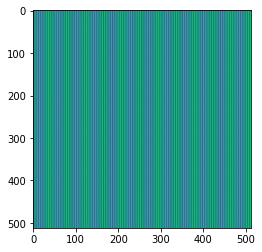

In [13]:
plt.imshow(np.abs(z))

Text(0.5, 1.0, 'R Fourier transform')

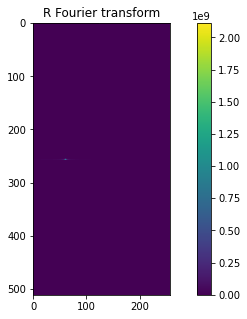

In [14]:
def plot_spectrum(im_fft):
    # A logarithmic colormap
    plt.imshow(np.abs(im_fft))
    plt.colorbar()

plt.figure(figsize=(10,5))
plot_spectrum(im)
plt.title('R Fourier transform')

Text(0.5, 1.0, 'Fourier transform')

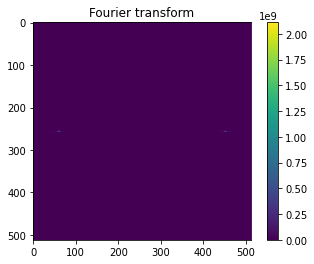

In [15]:
m = fft2(z)
plt.figure()
plot_spectrum(np.abs(m))
plt.title('Fourier transform')